# Aliens
#### BA500 Data Analysis Final Project
###### Bridget Weill, James Neri, & Adam Riestis

In [ ]:
# Import all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
import seaborn as sns
from numpy import median

# Upload csv files into dataframes.

usaliens_df = pd.read_csv('USAliens.csv')
brewbeer_df = pd.read_csv('brewbeer.csv')

In [93]:
usaliens_df.head()

,Datetime,City,State,Country,Shape,Duration (seconds),Minutes,Hours,Duration (hours/min),Comments,Date Posted,Latitude,Longitude
0,10/7/13 8:00 PM,oklahoma,ok,us,circle,10526400.0,175440.0,2924.000000,4 months,Bright flying orb.,10/14/13,35.46756,-97.516428
1,1/1/77 2:30 AM,new canaan,ct,us,NaN,9468000.0,157800.0,2630.000000,2-3 years,possible abductions when I was a kid living in...,11/19/98,41.1466667,-73.495278
2,1/1/05 12:00 AM,wikitravel,hi,us,diamond,6312000.0,105200.0,1753.333333,new years,this all happened in one little section.,2/1/07,0,0.000000
3,12/31/06 11:00 PM,imperial desert,ca,us,oval,6312000.0,105200.0,1753.333333,new years eve,The Object was more round than Oval. It was be...,2/1/07,32.841179,-115.590169
4,12/31/09 11:30 PM,livingston,la,us,unknown,6312000.0,105200.0,1753.333333,new years,The 12 UFO we seen brite yellow like a street ...,2/14/10,30.5019444,-90.747778


In [122]:
usaliens_df['Date'] = usaliens_df.Datetime.str.split(' ', expand = True)[0]
usaliens_df['Time'] = usaliens_df.Datetime.str.split(' ', expand = True)[1]
usaliens_df['AM_PM'] = usaliens_df.Datetime.str.split(' ', expand = True)[2]
usaliens_df.head(2)

,Datetime,City,State,Country,Shape,Duration (seconds),Minutes,Hours,Duration (hours/min),Comments,Date Posted,Latitude,Longitude,Date,Time,AM_PM
0,10/7/13 8:00 PM,oklahoma,ok,us,circle,10526400.0,175440.0,2924.0,4 months,Bright flying orb.,10/14/13,35.46756,-97.516428,10/7/13,8:00,PM
1,1/1/77 2:30 AM,new canaan,ct,us,NaN,9468000.0,157800.0,2630.0,2-3 years,possible abductions when I was a kid living in...,11/19/98,41.1466667,-73.495278,1/1/77,2:30,AM


In [125]:
usaliens_df['Time_'] = usaliens_df['Time'].str.cat(usaliens_df['AM_PM'],sep=" ")
usaliens_df.head(2)

,Datetime,City,State,Country,Shape,Duration (seconds),Minutes,Hours,Duration (hours/min),Comments,Date Posted,Latitude,Longitude,Date,Time,AM_PM,Time_
0,10/7/13 8:00 PM,oklahoma,ok,us,circle,10526400.0,175440.0,2924.0,4 months,Bright flying orb.,10/14/13,35.46756,-97.516428,10/7/13,8:00,PM,8:00 PM
1,1/1/77 2:30 AM,new canaan,ct,us,NaN,9468000.0,157800.0,2630.0,2-3 years,possible abductions when I was a kid living in...,11/19/98,41.1466667,-73.495278,1/1/77,2:30,AM,2:30 AM


In [95]:
usaliens_df['State'].value_counts().head()

ca    10449
wa     4651
fl     4598
tx     4050
ny     3511
Name: State, dtype: int64

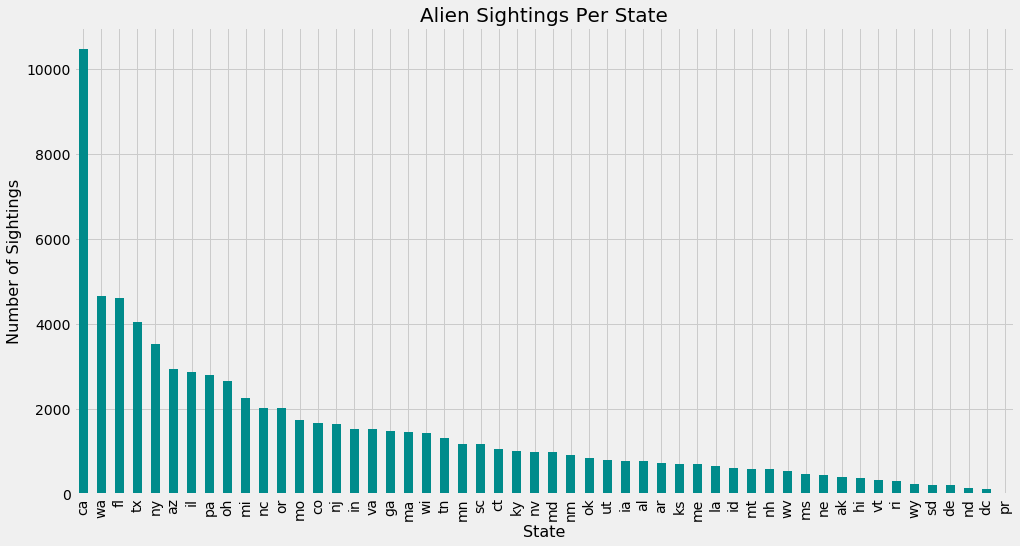

In [96]:
states = usaliens_df['State'].value_counts().plot(kind='bar', figsize=(15,8), color='darkcyan')
states.set_title('Alien Sightings Per State',fontsize=20)
states.set_xlabel('State',fontsize=16)
states.set_ylabel('Number of Sightings',fontsize=16)
plt.show()

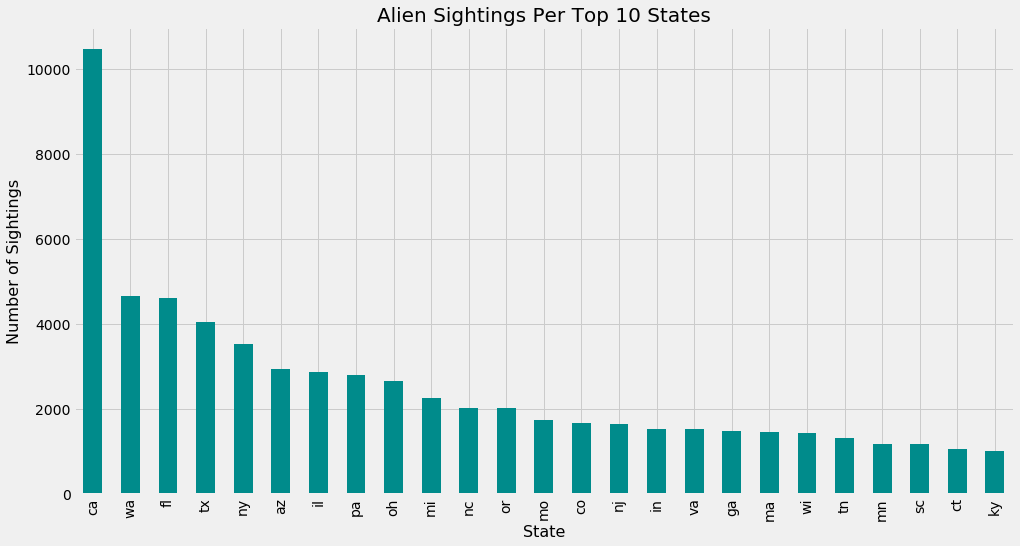

In [97]:
states = usaliens_df['State'].value_counts().head(25).plot(kind='bar', figsize=(15,8), color='darkcyan')
states.set_title('Alien Sightings Per Top 10 States',fontsize=20)
states.set_xlabel('State',fontsize=16)
states.set_ylabel('Number of Sightings',fontsize=16)
plt.show()

In [162]:
count = usaliens_df['Shape'].value_counts().head(10)
count

light        15618
triangle      7565
circle        7221
fireball      5829
unknown       5567
other         5351
disk          5112
sphere        4979
oval          3580
formation     2308
Name: Shape, dtype: int64

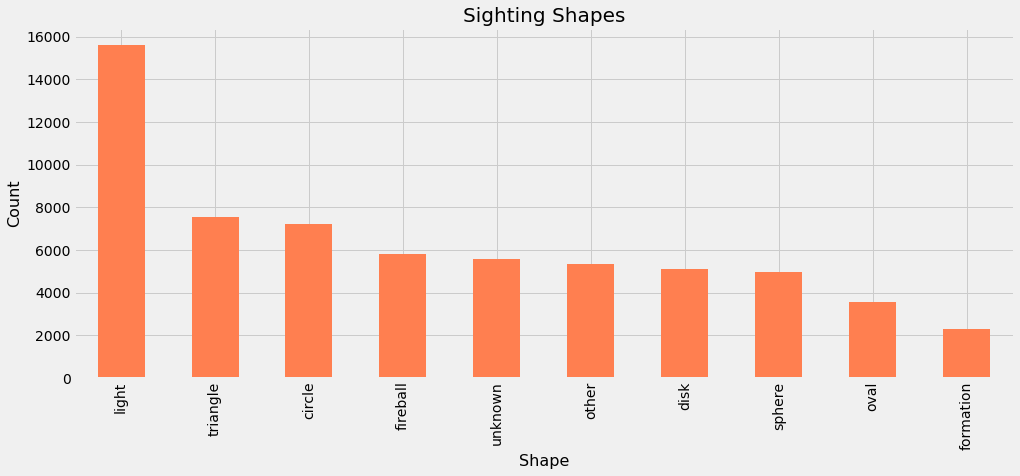

In [156]:
shapes = usaliens_df['Shape'].value_counts().head(10).plot(kind='bar', figsize=(15,6), color='coral')
shapes.set_title('Sighting Shapes',fontsize=20)
shapes.set_xlabel('Shape',fontsize=16)
shapes.set_ylabel('Count',fontsize=16)
plt.show()

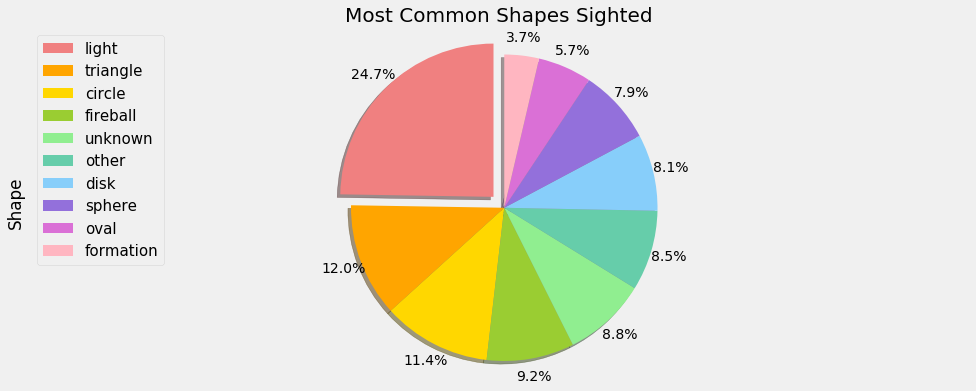

In [172]:
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)
colors= ['lightcoral','orange','gold','yellowgreen','lightgreen','mediumaquamarine','lightskyblue','mediumpurple','orchid','lightpink']

count.plot(kind='pie',explode=explode, shadow=True, labels=None, colors=colors, startangle=90, pctdistance=1.12,figsize=(15,6), autopct='%1.1f%%')

plt.title('Most Common Shapes Sighted',fontsize=20)
plt.axis('equal')
plt.legend(labels=count.index,loc='upper left',fontsize=15)

plt.show()

In [ ]:
usaliens_df['City'].value_counts().head()

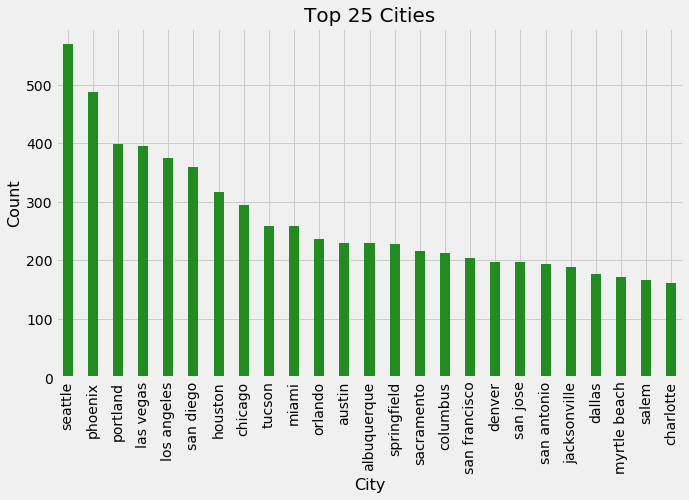

In [101]:
city = usaliens_df['City'].value_counts(ascending=False).head(25).plot.bar(width = .4,color = 'forestgreen',figsize=(10,6))
city.set_title('Top 25 Cities',fontsize=20)
city.set_xlabel('City',fontsize=16)
city.set_ylabel('Count',fontsize=16)
plt.show()

In [103]:
import geopandas
import geoplot
import pandas as pd
from shapely import wkt
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString, Polygon
import re
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from pathlib import Path
from PIL import Image
from IPython.display import HTML
from matplotlib import animation, rc
import plotly.figure_factory as ff

,geometry
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497..."
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628..."
2,"POLYGON ((-111.47543 44.70216, -111.48080 44.6..."
3,"MULTIPOLYGON (((-69.77728 44.07415, -69.85993 ..."
4,"POLYGON ((-98.73044 45.93827, -99.00683 45.939..."


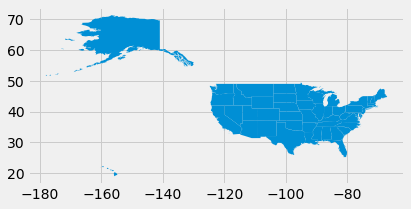

In [104]:
usa = geopandas.read_file("states.shp")
usa_geo = geopandas.GeoDataFrame(usa, crs = {'init' :'epsg:4326'}, geometry = usa.geometry)
usa_geo.plot()
usa_geo.head()

In [105]:
geopandas_states_abbrev = ['HI',
                    'WA',
                    'MT',
                    'ME',
                    'ND',
                    'SD',
                    'WY',
                    'WI',
                    'ID',
                    'VT',
                    'MN',
                    'OR',
                    'NH',
                    'IA',
                    'MA',
                    'NE',
                    'NY',
                    'PA',
                    'CT',
                    'RI',
                    'NJ',
                    'IN',
                    'NV',
                    'UT',
                    'CA',
                    'OH',
                    'IL',
                    'DC',
                    'DE',
                    'WV',
                    'MD',
                    'CO',
                    'KY',
                    'KS',
                    'VA',
                    'MO',
                    'AZ',
                    'OK',
                    'NC',
                    'TN',
                    'TX',
                    'NM',
                    'AL',
                    'MS',
                    'GA',
                    'SC',
                    'AR',
                    'LA',
                    'FL',
                    'MI',
                    'AK']

In [106]:
usa['state_abbrev'] = geopandas_states_abbrev
usa.head(2)

,geometry,state_abbrev
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA


In [107]:
Count= {'AK':395,
 'AL':761,
 'AR':733,
 'AZ':2939,
 'CA':10449,
 'CO':1654,
 'CT':1063,
 'DC':112,
 'DE':200,
 'FL':4598,
 'GA':1476,
 'HI':383,
 'IA':770,
 'ID':607,
 'IL':2873,
 'IN':1534,
 'KS':706,
 'KY':1002,
 'LA':642,
 'MA':1464,
 'MD':979,
 'ME':692,
 'MI':2254,
 'MN':1175,
 'MO':1725,
 'MS':460,
 'MT':575,
 'NC':2018,
 'ND':147,
 'NE':447,
 'NH':575,
 'NJ':1639,
 'NM':914,
 'NV':989,
 'NY':3511,
 'OH':2641,
 'OK':835,
 'OR':2014,
 'PA':2782,
 'RI':312,
 'SC':1169,
 'SD':218,
 'TN':1311,
 'TX':4050,
 'UT':799,
 'VA':1515,
 'VT':335,
 'WA':4651,
 'WI':1428,
 'WV':539,
 'WY':228
}

In [108]:
usa['Count'] = usa['state_abbrev'].map(Count)
usa.head(2)

,geometry,state_abbrev,Count
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,383
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,4651


In [109]:
geopandas_states = {'HI':'Hawaii',
                   'WA':'Washington',
                   'MT':'Montana',
                   'ME': 'Maine',
                   'ND': 'North Dakota',
                   'SD': 'South Dakota',
                   'WY': 'Wyoming',
                   'WI': 'Wisconsin',
                   'ID': 'Idaho',
                   'VT': 'Vermont',
                   'MN': 'Minnesota',
                   'OR': 'Oregon',
                   'NH': 'New Hampshire',
                   'IA': 'Iowa',
                   'MA': 'Massachusetts',
                   'NE': 'Nebraska',
                   'NY': 'New York',
                   'PA': 'Pennsylvania',
                   'CT': 'Connecticut',
                   'RI': 'Rhode Island',
                   'NJ': 'New Jersey',
                   'IN': 'Indiana',
                   'NV': 'Nevada',
                   'UT': 'Utah',
                   'CA': 'California',
                   'OH': 'Ohio',
                   'IL': 'Illinois',
                   'DC': 'Washington DC',
                   'DE': 'Delaware',
                   'WV': 'West Virginia',
                   'MD': 'Maryland',
                   'CO': 'Colorado',
                   'KY': 'Kentucky',
                   'KS': 'Kansas',
                   'VA': 'Virginia',
                   'MO': 'Missouri',
                   'AZ': 'Arizona',
                   'OK': 'Oklahoma',
                   'NC': 'North Carolina',
                   'TN': 'Tennessee',
                   'TX': 'Texas',
                   'NM': 'New Mexico',
                   'AL': 'Alabama',
                   'MS': 'Mississippi',
                   'GA': 'Georgia',
                   'SC': 'South Carolina',
                   'AR': 'Arkansas',
                   'LA': 'Louisiana',
                   'FL': 'Florida',
                   'MI': 'Michigan',
                   'AK': 'Alaska'
                   }

In [110]:
usa['state'] = usa['state_abbrev'].map(geopandas_states)
usa.head(2)

,geometry,state_abbrev,Count,state
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,383,Hawaii
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,4651,Washington


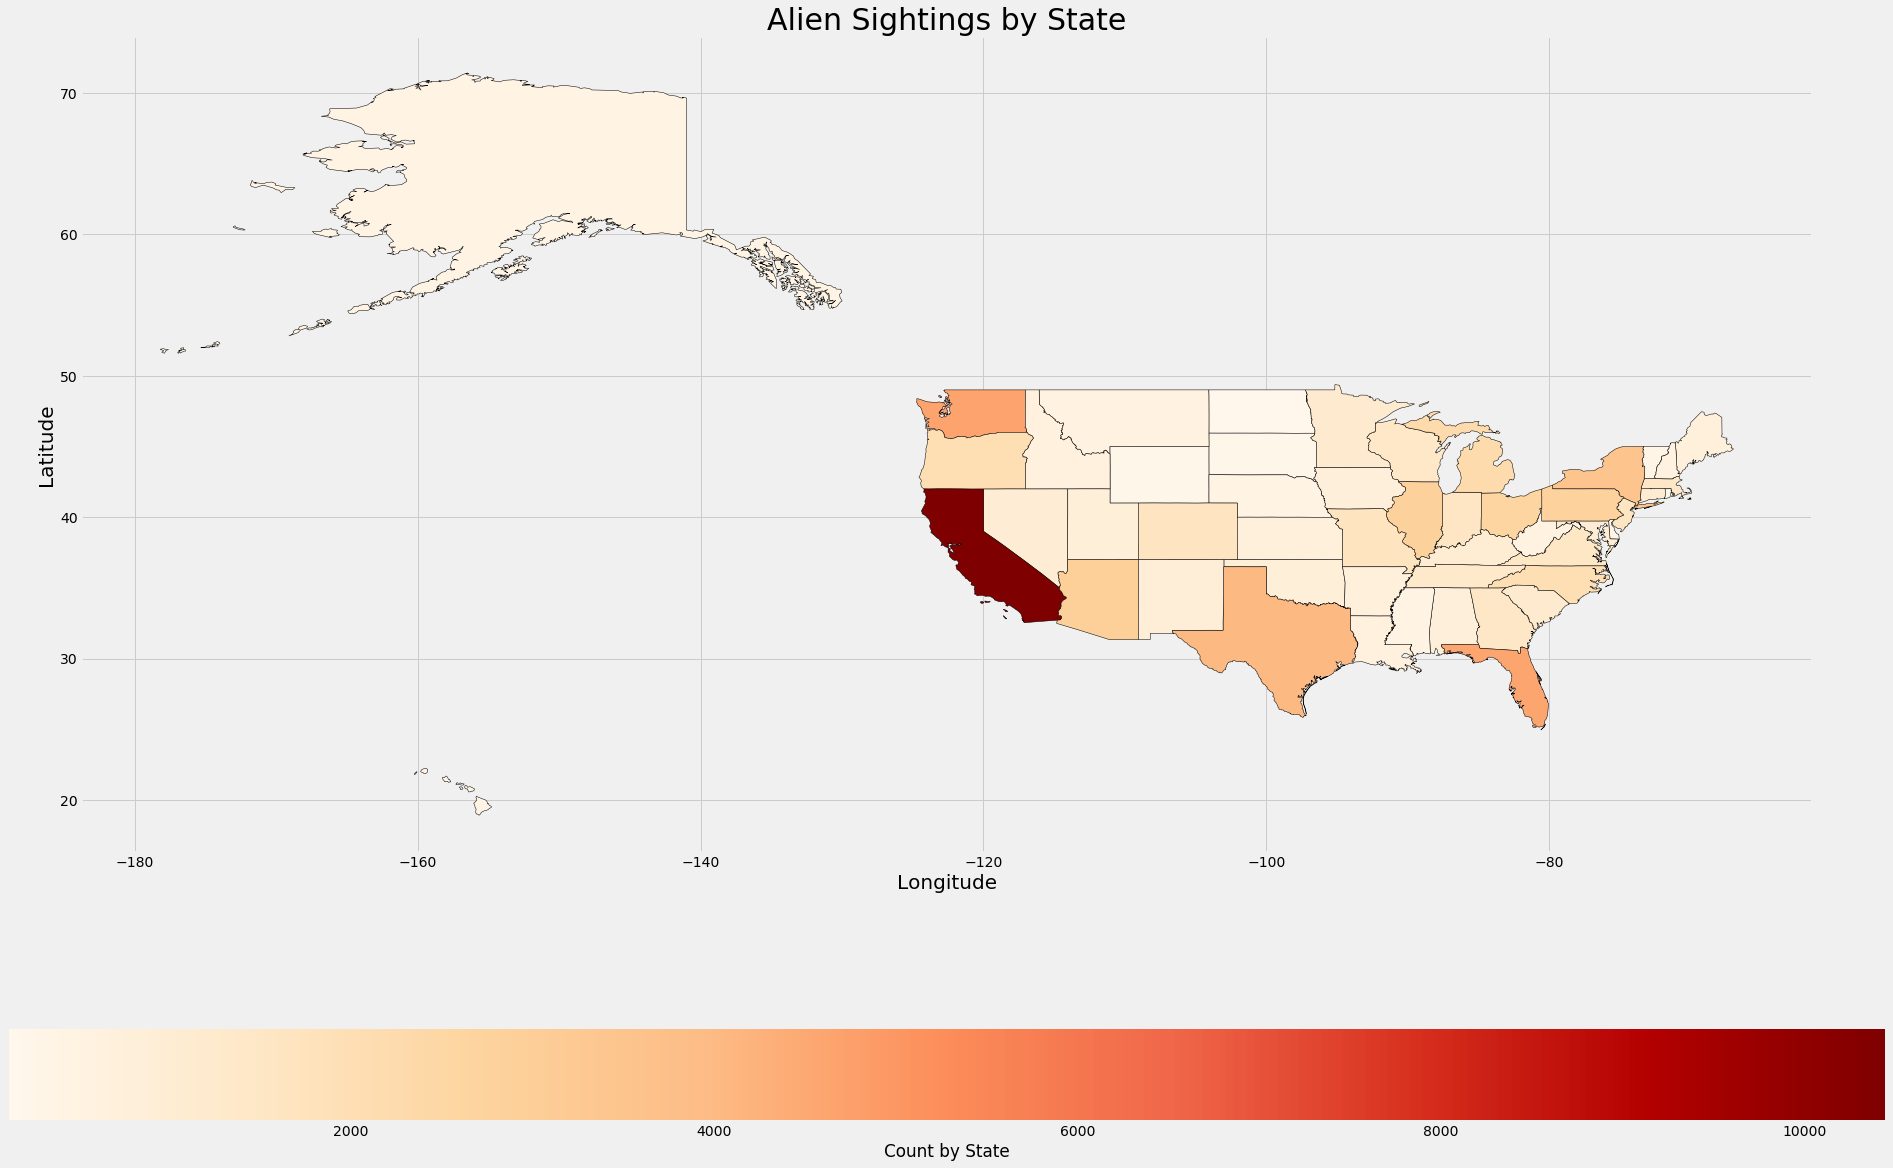

In [111]:
usa.plot(column='Count',figsize=(30,20), cmap='OrRd', edgecolor='black',legend=True,legend_kwds={'label': "Count by State",'orientation': "horizontal"})
plt.title('Alien Sightings by State',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

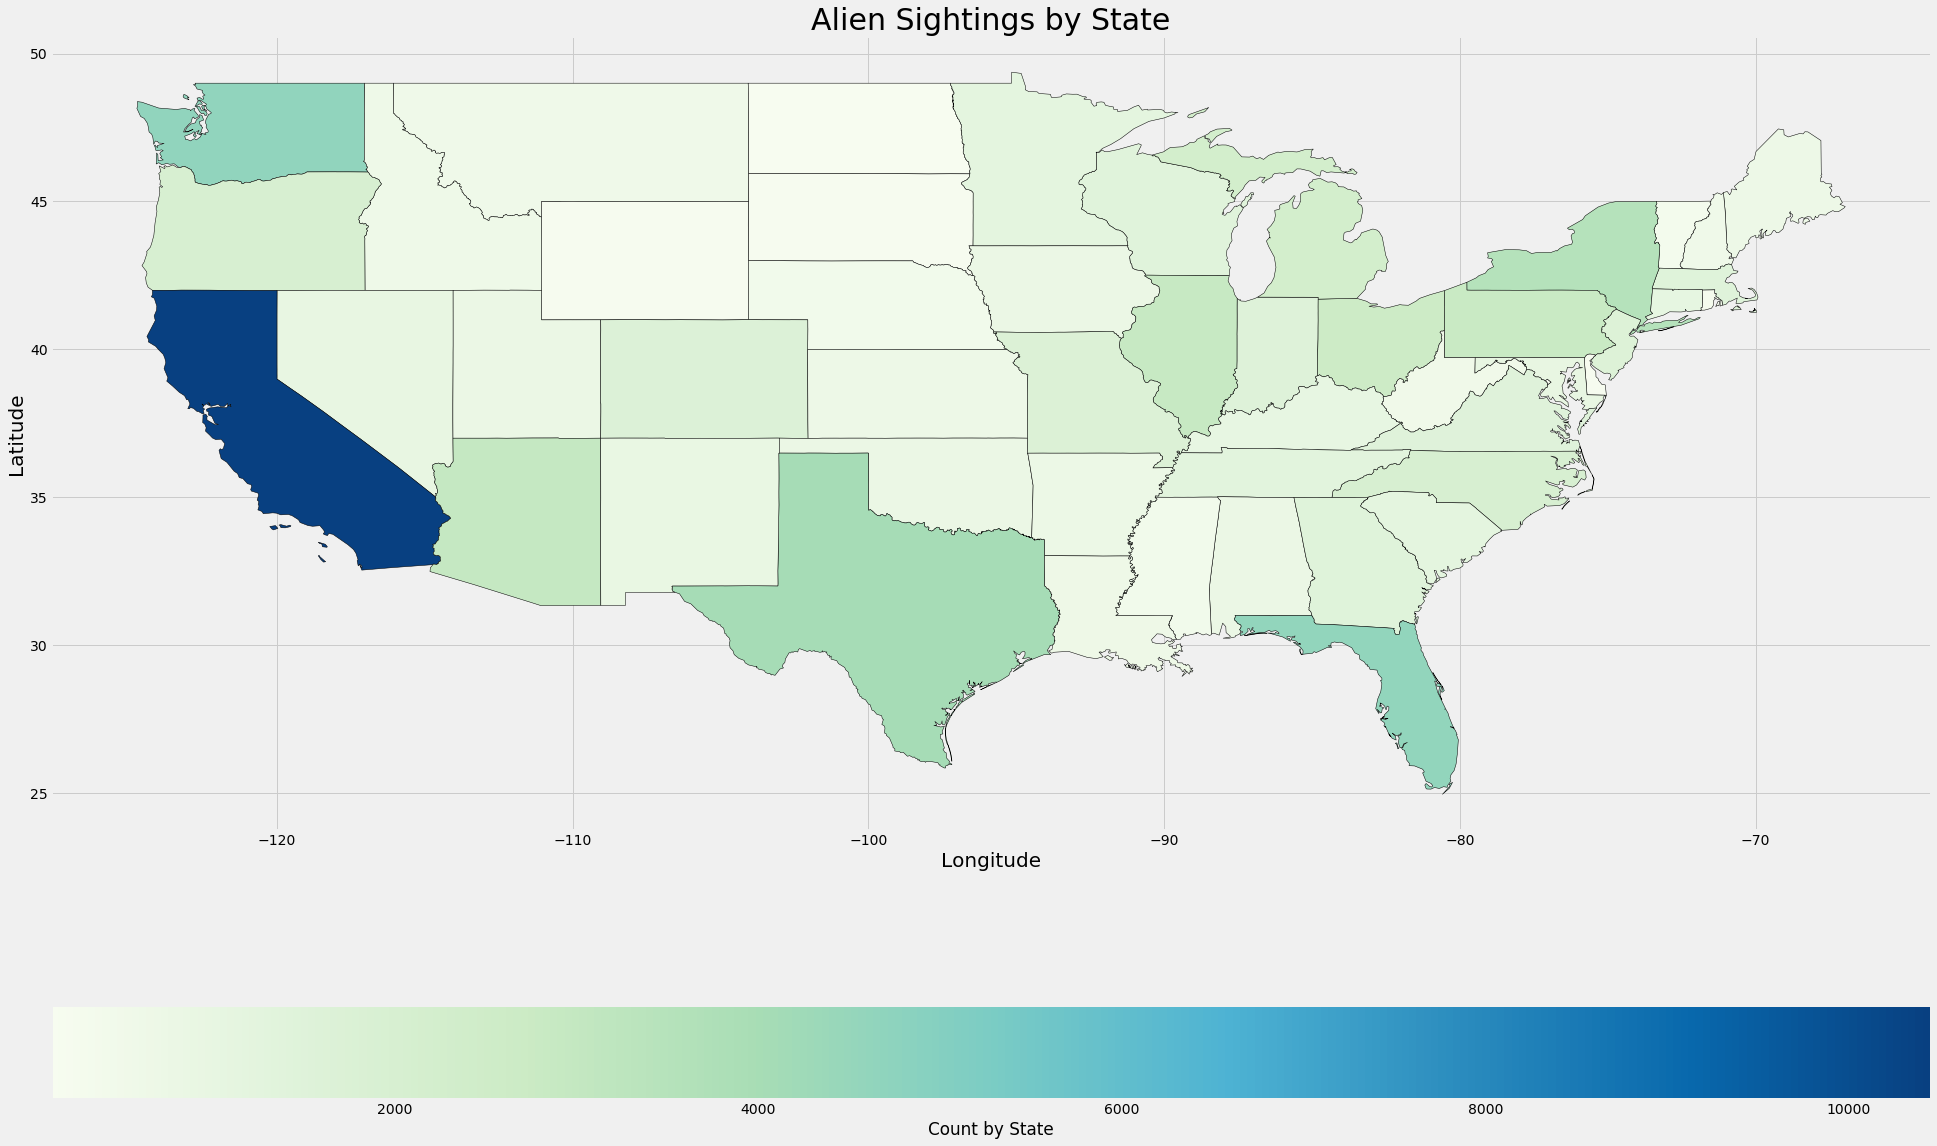

In [112]:
usa[usa['state'].isin(['Alaska','Hawaii']) == False].plot(column='Count',figsize=(30,20), cmap='GnBu', edgecolor='black',legend=True,legend_kwds={'label': "Count by State",'orientation': "horizontal"})
plt.title('Alien Sightings by State',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

In [137]:
PercentCount= {'AK':0.00013106,
 'AL':0.0001556915066,
 'AR':0.0001022080566,
 'AZ':0.0004098082923,
 'CA':0.0002641501659,
 'CO':0.0002904014422,
 'CT':0.0002975369927,
 'DC':0.000000000055,
 'DE':0.0002067886651,
 'FL':0.0002158753857,
 'GA':0.0001403111847,
 'HI':0.0002696250803,
 'IA':0.0002439685122,
 'ID':0.0003460251008,
 'IL':0.0002254910887,
 'IN':0.0002292331092,
 'KS':0.0002424862743,
 'KY':0.0002242412388,
 'LA':0.0001377688908,
 'MA':0.0002121078522,
 'MD':0.0001620131868,
 'ME':0.0005170337208,
 'MI':0.0002254921135,
 'MN':0.000209403407,
 'MO':0.0002815659047,
 'MS':0.0001540249052,
 'MT':0.0005412758106,
 'NC':0.0001943445542,
 'ND':0.000193401458,
 'NE':0.0002316940933,
 'NH':0.0004238981229,
 'NJ':0.0001839811776,
 'NM':0.0004361877383,
 'NV':0.0003259302028,
 'NY':0.0001796623913,
 'OH':0.0002259303738,
 'OK':0.0002117634468,
 'OR':0.0004805864778,
 'PA':0.0002172239374,
 'RI':0.0002950870838,
 'SC':0.0002299313137,
 'SD':0.0002470996957,
 'TN':0.000193648163,
 'TX':0.0001411059115,
 'UT':0.0002527597154,
 'VA':0.0001778652298,
 'VT':0.0005348882882,
 'WA':0.0006172044104,
 'WI':0.0002456322864,
 'WV':0.0002984773777,
 'WY':0.0003946432373
}

In [138]:
usa['PercentCount'] = usa['state_abbrev'].map(PercentCount)
usa.head(2)

,geometry,state_abbrev,Count,state,PercentCount
0,"MULTIPOLYGON (((-160.07380 22.00418, -160.0497...",HI,383,Hawaii,0.000270
1,"MULTIPOLYGON (((-122.40202 48.22522, -122.4628...",WA,4651,Washington,0.000617


In [139]:
usa.isna().sum()

geometry        0
state_abbrev    0
Count           0
state           0
PercentCount    0
dtype: int64

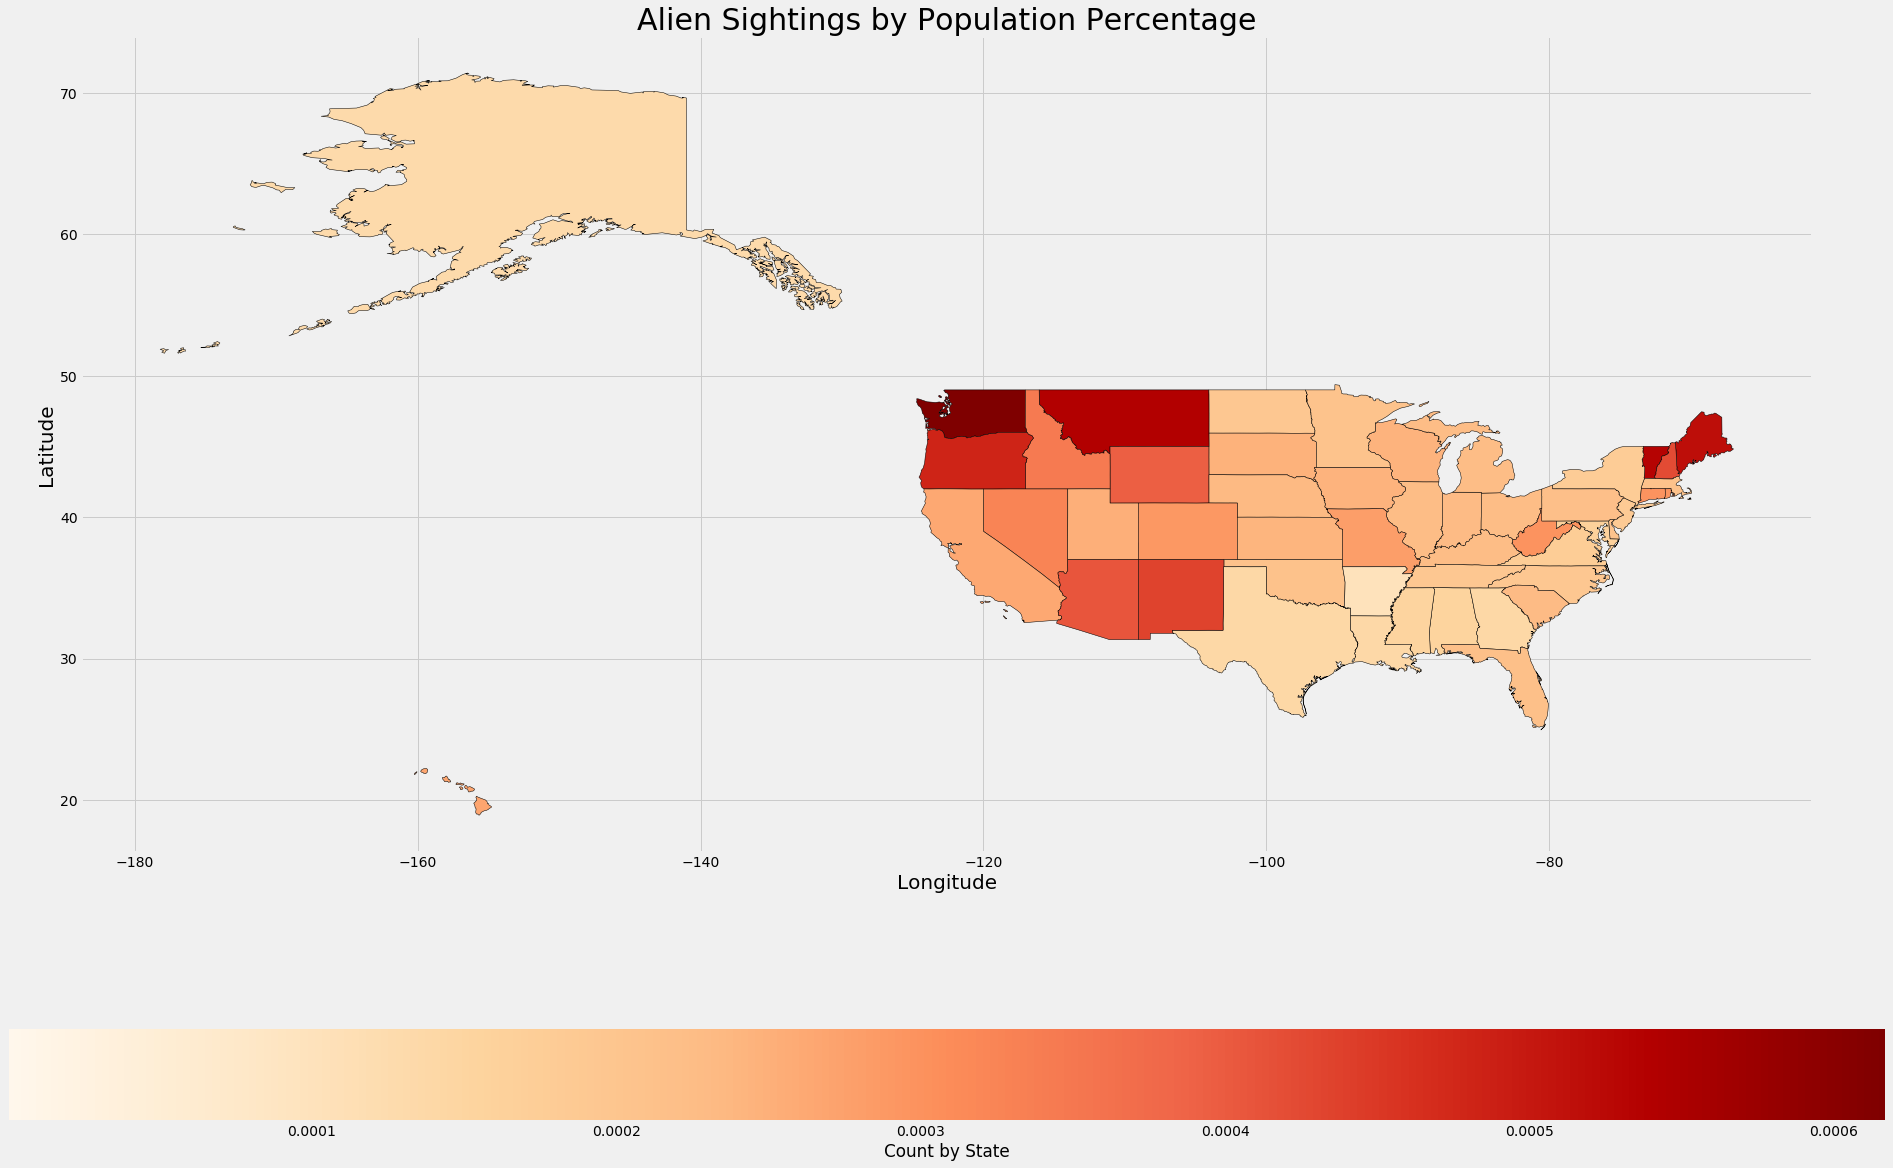

In [141]:
usa.plot(column='PercentCount',figsize=(30,20), cmap='OrRd', edgecolor='black',legend=True,legend_kwds={'label': "Count by State",'orientation': "horizontal"})
plt.title('Alien Sightings by Population Percentage',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

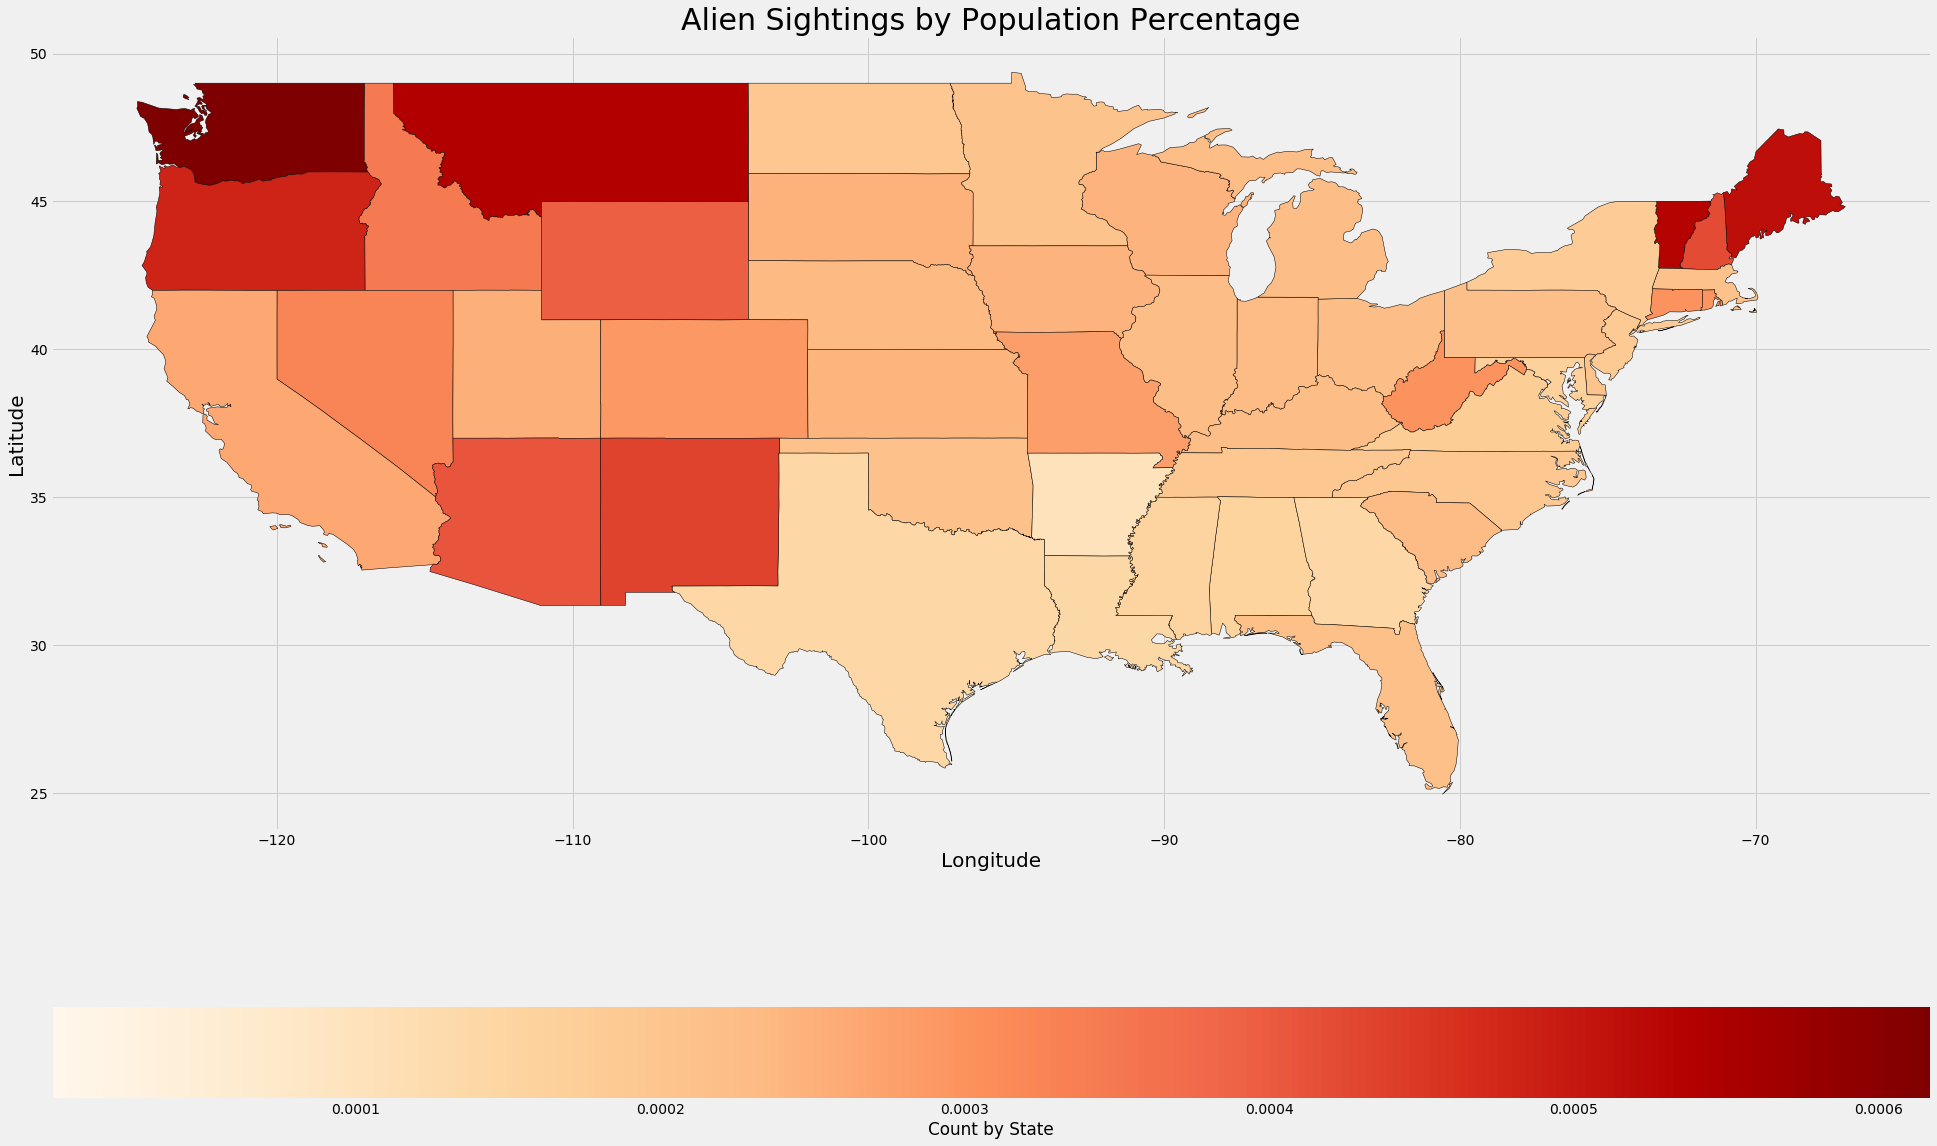

In [168]:
usa[usa['state'].isin(['Alaska','Hawaii']) == False].plot(column='PercentCount',figsize=(30,20), cmap='OrRd', edgecolor='black',legend=True,legend_kwds={'label': "Count by State",'orientation': "horizontal"})
plt.title('Alien Sightings by Population Percentage',fontsize=30)
plt.xlabel('Longitude',fontsize=20)
plt.ylabel('Latitude',fontsize=20)
plt.show()

In [144]:
brewbeer_df.head()

,Unnamed: 0,abv,id,name_x,style,brewery_id,ounces,ID,name_y,city,state,city_state
0,0,0.05,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR,"Bend, OR"
1,1,0.07,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"
2,2,0.07,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"
3,3,0.09,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"
4,4,0.07,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN,"Gary, IN"


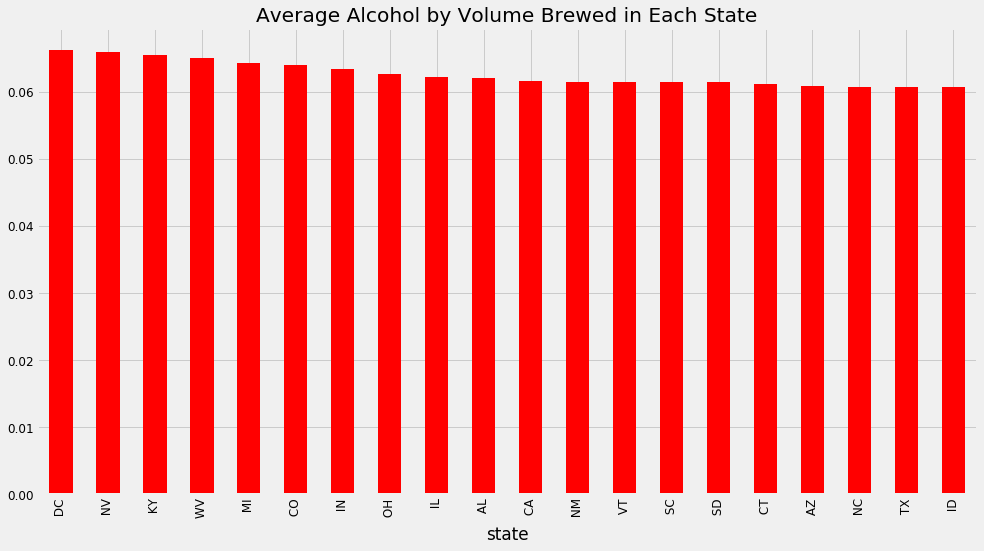

In [146]:
states_highest_alc = brewbeer_df.groupby('state')['abv'].mean().nlargest(20)

states_highest_alc.plot(kind='bar', figsize=(15,8), color='red', title='Average Alcohol by Volume Brewed in Each State',fontsize=12)

plt.show()